1. Import a test image

img shapes : (650, 607)


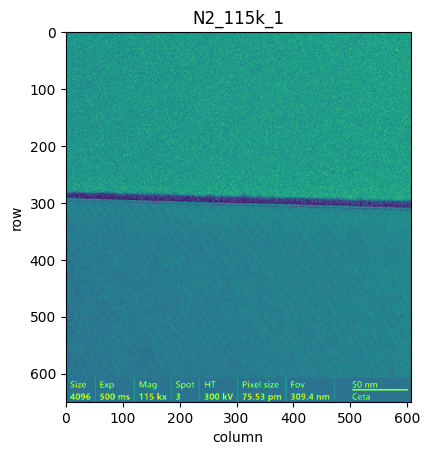

In [2]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('TEM_image/N2_115k_1.jpg', cv2.IMREAD_GRAYSCALE)
print('img shapes :', img.shape)

plt.imshow(img)
plt.xlabel('column')
plt.ylabel('row')
plt.title('N2_115k_1')
plt.show()

2. Extract information from the bottom box

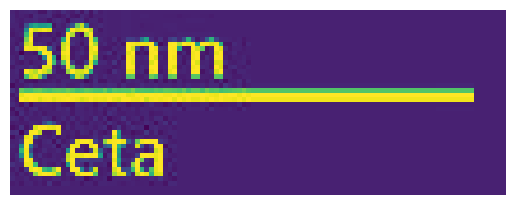

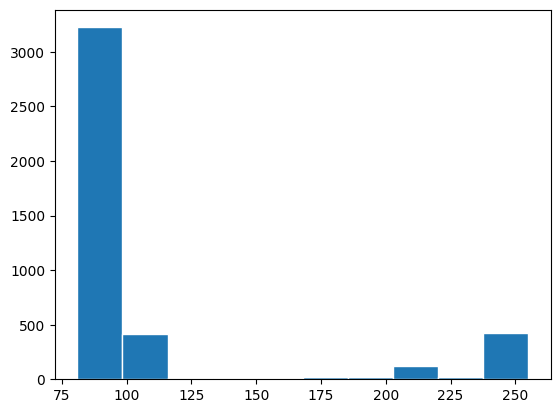

In [4]:
import numpy as np
# scale bar
scale_bar = img[610:,500:]
plt.imshow(scale_bar)
plt.axis('off')
plt.show()

plt.hist(np.array(scale_bar).flatten(), edgecolor='white')
plt.show()

In [5]:
_, binary = cv2.threshold(scale_bar, 200, 255, cv2.THRESH_BINARY_INV)
lines = cv2.HoughLinesP(binary, 1, np.pi/180, 100, 100, 10)[0][0]
bar_length = abs(lines[0]-lines[2])
bar_length

106

In [6]:
# read the number above the bar with tesseract
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

custom_config = r'--oem 3 --psm 6 outputbase digits'
numbers = pytesseract.image_to_string(scale_bar, config=custom_config)
numbers

'50.\n'

In [7]:
# extract numbers from the string
import re
numbers = int(re.findall(r'\d+', numbers)[0])
numbers

50

Scaling is then done by (#pixel)/(bar_length[px])*numbers

In [8]:
def PxToLen(x): # [nm]
    return x*50/bar_length

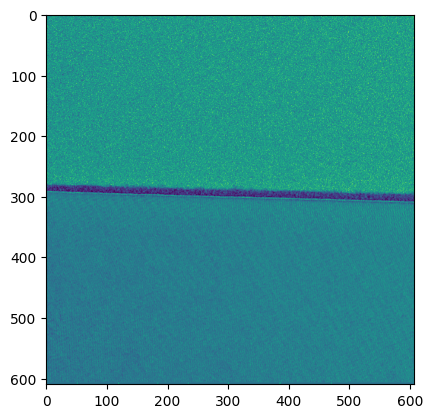

In [9]:
# Detect the thin film
film = img[:610,:]
plt.imshow(film)
plt.show()

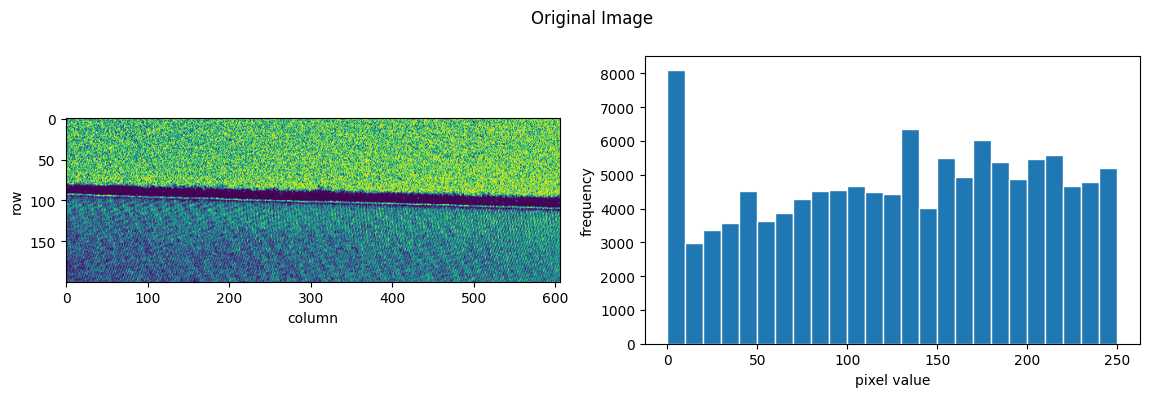

In [11]:
# histogram equalization; minmaxscaling * 255
film_equalized = cv2.equalizeHist(film)
fig, axs = plt.subplots(1,2,figsize=(12,4))
fig.tight_layout(pad=3)
axs[0].imshow(film_equalized[200:400,:])
axs[0].set_xlabel('column')
axs[0].set_ylabel('row')

axs[1].hist(np.array(film_equalized[200:400,:]).flatten(), edgecolor='white', bins=np.arange(0,260,10))
axs[1].set_xlabel('pixel value')
axs[1].set_ylabel('frequency')

fig.suptitle('Original Image', y=1)
plt.show()

fig.savefig('original.png', bbox_inches='tight')

In [12]:
lines = cv2.HoughLinesP(film_equalized, 1, np.pi/180, 100, 100, 10)[0]
lines

array([[301, 300, 606, 605]], dtype=int32)

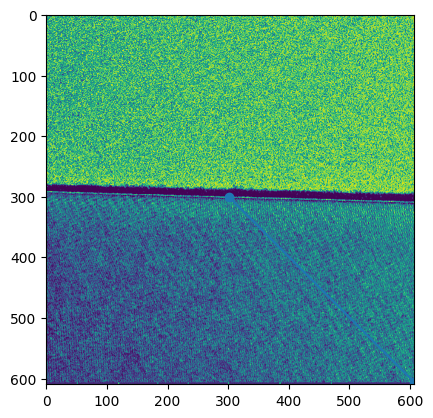

In [13]:
plt.imshow(film_equalized)
for x1, y1, x2, y2 in lines:
    plt.plot([x1, x2], [y1, y2], 'o-')
plt.show()

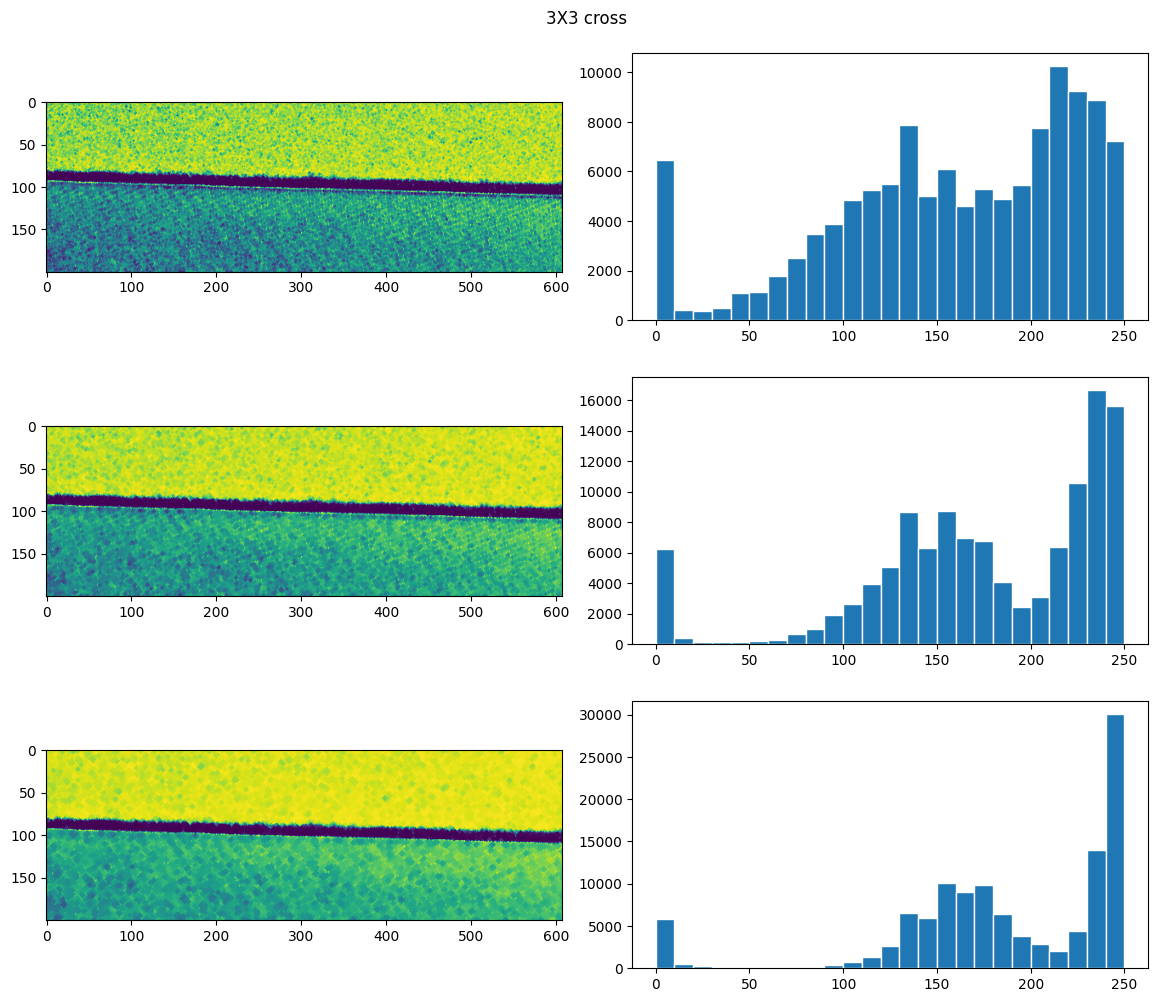

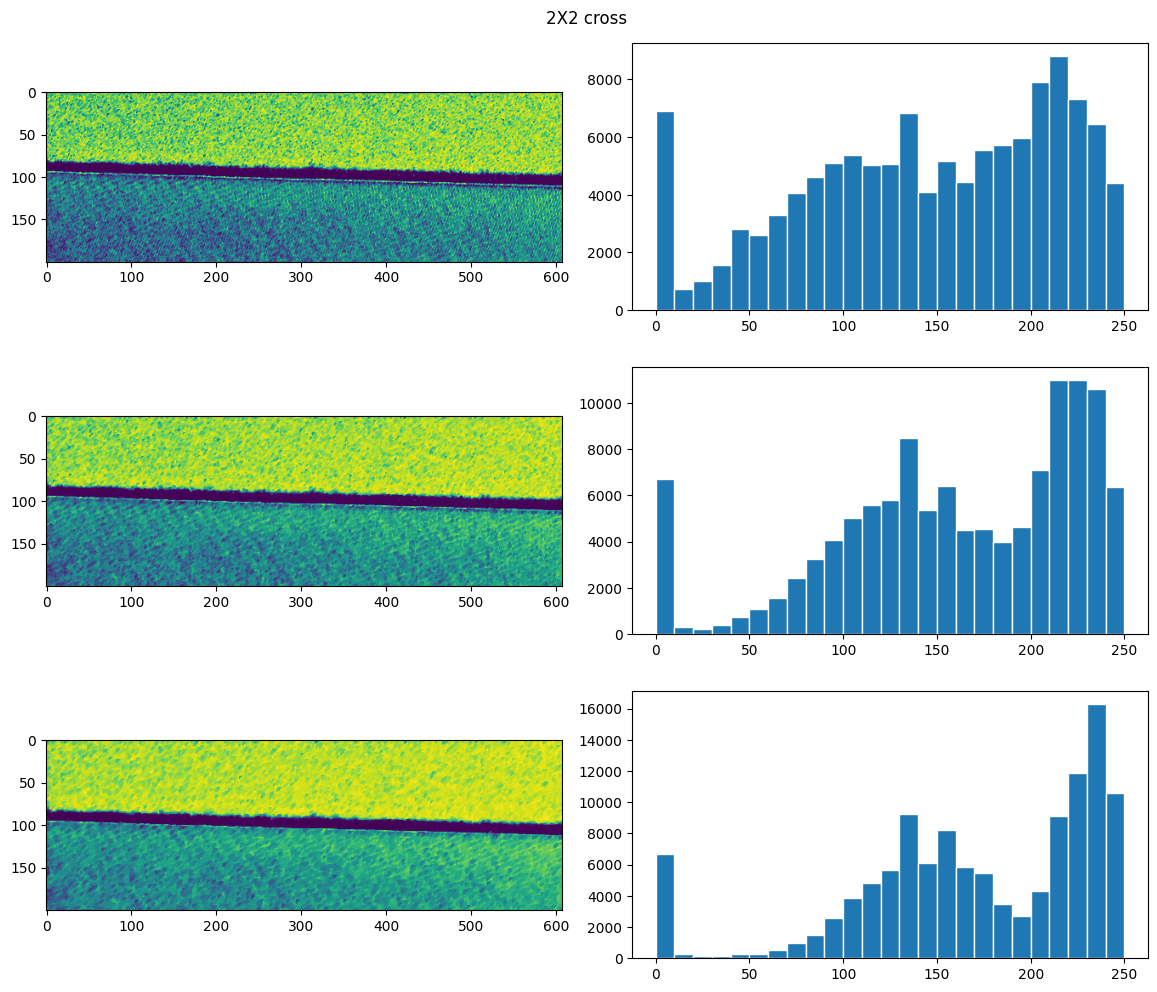

In [14]:
# noise must be further reduced!
# film_transformed = cv2.morphologyEx(film_equalized, op=cv2.MORPH_CLOSE, kernel=cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5)), iterations=1)
# plt.imshow(film_transformed)
# plt.show()

fig, axs = plt.subplots(3,2, figsize=(12,10))
fig.tight_layout(pad=2)
for i in range(3):
    film_transformed = cv2.morphologyEx(film_equalized[200:400,:], op=cv2.MORPH_CLOSE, kernel=cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3)), iterations=i+1)
    axs[i,0].imshow(film_transformed)
    axs[i,1].hist(np.array(film_transformed).flatten(), edgecolor='white', bins=np.arange(0,260,10))
fig.suptitle('3X3 cross',y=1.01)
plt.show()
# fig.savefig('images/cross3.png', bbox_inches = 'tight')

fig, axs = plt.subplots(3,2, figsize=(12,10))
fig.tight_layout(pad=2)
for i in range(3):
    film_transformed = cv2.morphologyEx(film_equalized[200:400,:], op=cv2.MORPH_CLOSE, kernel=cv2.getStructuringElement(cv2.MORPH_CROSS,(2,2)), iterations=i+1)
    axs[i,0].imshow(film_transformed)
    axs[i,1].hist(np.array(film_transformed).flatten(), edgecolor='white', bins=np.arange(0,260,10))
fig.suptitle('2X2 cross', y=1)
# fig.savefig('images/cross2.png', bbox_inches = 'tight')
plt.show()   

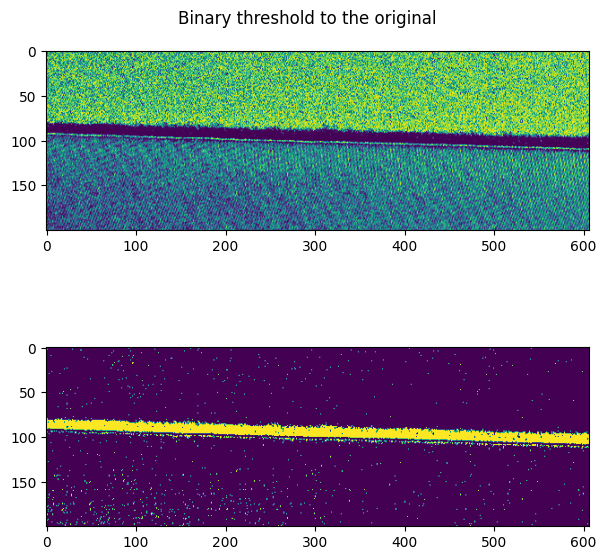

In [15]:
_, binary = cv2.threshold(film_equalized[200:400,:], 10, 255, cv2.THRESH_BINARY_INV)
fig, axs = plt.subplots(2, figsize=(6,6))
fig.tight_layout(pad=0.5)
axs[0].imshow(film_equalized[200:400,:])
axs[1].imshow(binary)
fig.suptitle('Binary threshold to the original')
plt.show()
# fig.savefig('images/binary_original.png', bbox_inches='tight')

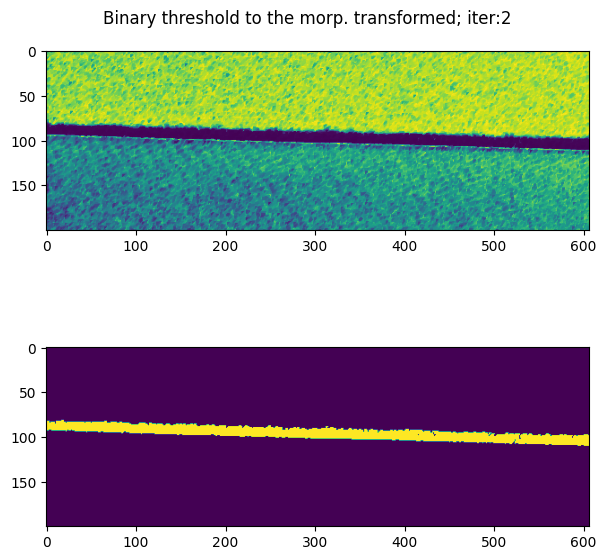

In [17]:
film_transformed = cv2.morphologyEx(film_equalized[200:400,:], op=cv2.MORPH_CLOSE, kernel=cv2.getStructuringElement(cv2.MORPH_CROSS,(2,2)), iterations=2)
_, binary = cv2.threshold(film_transformed, 10, 255, cv2.THRESH_BINARY_INV)
fig, axs = plt.subplots(2, figsize=(6,6))
fig.tight_layout(pad=0.5)
axs[0].imshow(film_transformed)
axs[1].imshow(binary)
fig.suptitle('Binary threshold to the morp. transformed; iter:2')
plt.show()
# fig.savefig('images/binary_iter2.png', bbox_inches='tight')

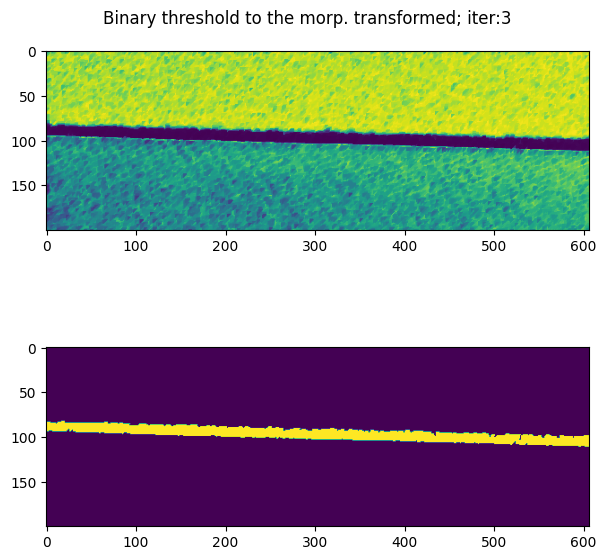

In [251]:
film_transformed = cv2.morphologyEx(film_equalized[200:400,:], op=cv2.MORPH_CLOSE, kernel=cv2.getStructuringElement(cv2.MORPH_CROSS,(2,2)), iterations=3)
_, binary = cv2.threshold(film_transformed, 10, 255, cv2.THRESH_BINARY_INV)
fig, axs = plt.subplots(2, figsize=(6,6))
fig.tight_layout(pad=0.5)
axs[0].imshow(film_transformed)
axs[1].imshow(binary)
fig.suptitle('Binary threshold to the morp. transformed; iter:3')
plt.show()
# fig.savefig('images/binary_iter3.png', bbox_inches='tight')

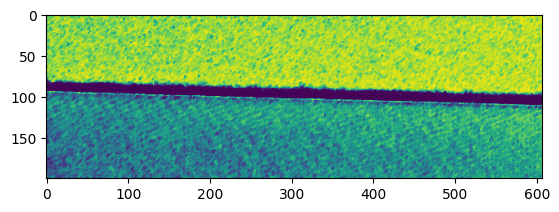

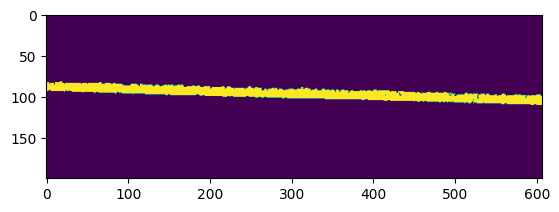

In [18]:
film_transformed = cv2.morphologyEx(film_equalized[200:400,:], op=cv2.MORPH_CLOSE, kernel=cv2.getStructuringElement(cv2.MORPH_CROSS,(2,2)), iterations=2)
_, binary = cv2.threshold(film_transformed, 10, 255, cv2.THRESH_BINARY_INV)
plt.imshow(film_transformed)
plt.show()
plt.imshow(binary)
plt.show()

In [19]:
binary.shape

(200, 607)

In [20]:
# go with iter=2
film_transformed = cv2.morphologyEx(film_equalized[200:400,:], op=cv2.MORPH_CLOSE, kernel=cv2.getStructuringElement(cv2.MORPH_CROSS,(2,2)), iterations=3)
_, binary = cv2.threshold(film_transformed, 10, 255, cv2.THRESH_BINARY_INV)
lines = cv2.HoughLinesP(binary, 1, np.pi/180, 600, 1200, 600)[0]
lines

array([[  0,  86, 606, 107]], dtype=int32)

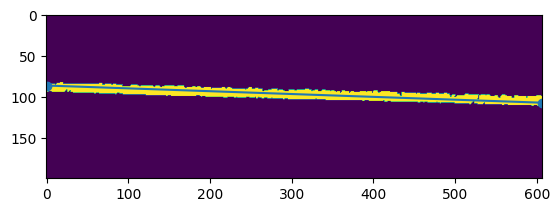

In [21]:
plt.imshow(binary)
for x1, y1, x2, y2 in lines:
    plt.plot([x1, x2], [y1, y2], 'o-')
plt.show()

This line is not trustworthy

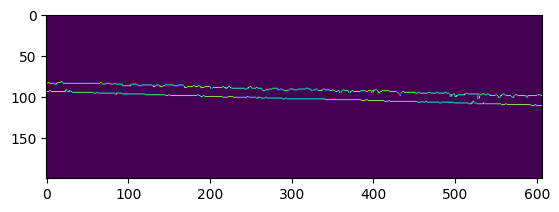

In [22]:
edges = cv2.Canny(binary, 200,100)
plt.imshow(edges)

In [24]:
nonzero_point = []
for j in [0, edges.shape[1]-1]:
    for i in range(edges.shape[0]):
        if edges[i][j] != 0:
            nonzero_point.append((i,j))
nonzero_point

[(84, 0), (94, 0), (99, 606), (111, 606)]

In [26]:
def findCenter(p1, p2, p3, p4):
    center_x = (p1[0] + p2[0] + p3[0] + p4[0]) / 4
    center_y = (p1[1] + p2[1] + p3[1] + p4[1]) / 4
    return (center_x, center_y)

p1 = nonzero_point[0]
p2 = nonzero_point[1]
p3 = nonzero_point[2]
p4 = nonzero_point[3]

centroid = findCenter(p1, p2, p3, p4)
centroid

(97.0, 303.0)

In [27]:
# rotation angle
import math
p1 = nonzero_point[1]
p2 = nonzero_point[3]
print(p1, p2)
rot_angle = math.atan(abs(p1[1]-p2[1])/abs(p1[0]-p2[0]))

(94, 0) (111, 606)


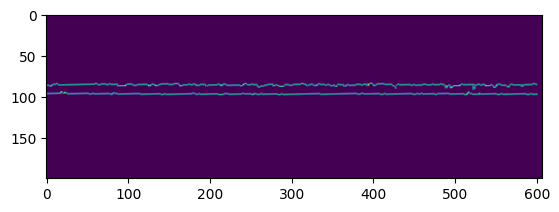

In [28]:
# rotate the object
center = (97.0, 303.0)
rot_matrix = cv2.getRotationMatrix2D(center, rot_angle, 1.0)
rotated_image = cv2.warpAffine(edges, rot_matrix, (edges.shape[1], edges.shape[0]))

plt.imshow(rotated_image)
plt.show()

In [30]:
final_img = rotated_image[:int(center[0]),:]
final_img.shape

(97, 607)

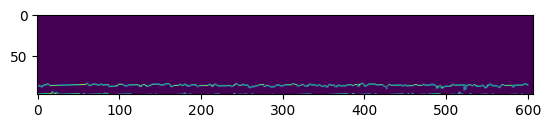

In [31]:
# vertical translation given the center position
plt.imshow(final_img)
plt.show()

In [32]:
thickness_px = []
for j in range(final_img.shape[1]): # horizontal
    for i in range(final_img.shape[0]): # vertical
        if final_img[i][j] != 0:
            thickness_px.append(abs(i-int(center[0])))
            break
len(thickness_px)
print(thickness_px[:5])

[11, 11, 11, 11, 11]


In [33]:
# to real length given the scale bar
thickness = [round(PxToLen(x),3) for x in thickness_px]
position = [round(PxToLen(x),3) for x in range(len(thickness))]
thickness[:5]

[5.189, 5.189, 5.189, 5.189, 5.189]

In [34]:
print(min(thickness), max(thickness))

4.245 6.604


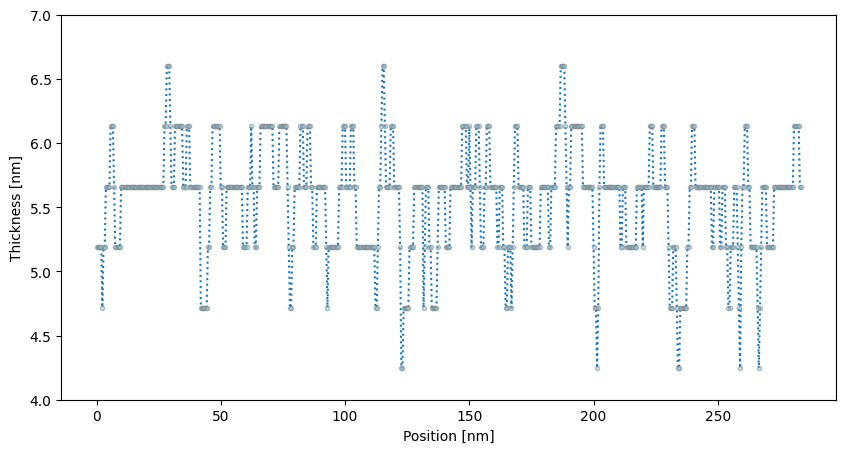

In [81]:
plt.figure(figsize=(10,5))
plt.plot(position, thickness, ':')
plt.plot(position, thickness, 'o', color='skyblue', markersize=3, markeredgecolor='gray', alpha=0.5)
plt.xlabel('Position [nm]')
plt.ylim(np.floor(min(thickness)), np.ceil(max(thickness)))
plt.ylabel('Thickness [nm]')
plt.show()

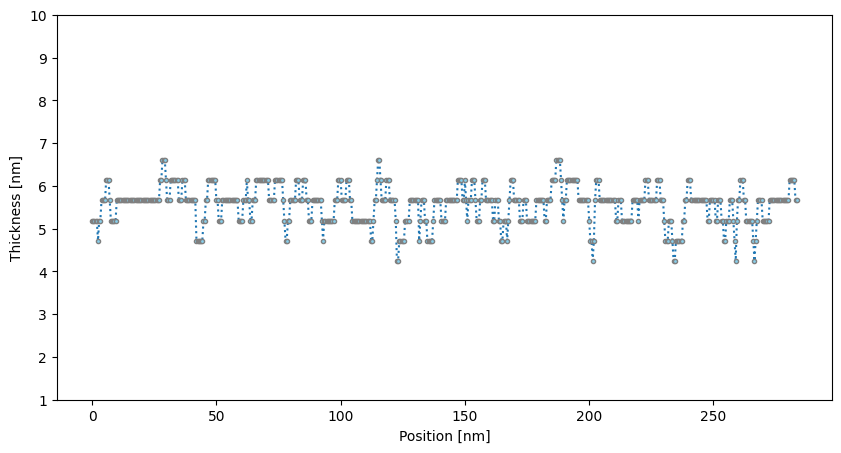

In [65]:
plt.figure(figsize=(10,5))
plt.plot(position, thickness, ':')
plt.plot(position, thickness, 'o', color='skyblue', markersize=3, markeredgecolor='gray')
plt.xlabel('Position [nm]')
plt.ylim(np.floor(min(thickness))-3, np.ceil(max(thickness))+3)
plt.ylabel('Thickness [nm]')
plt.show()

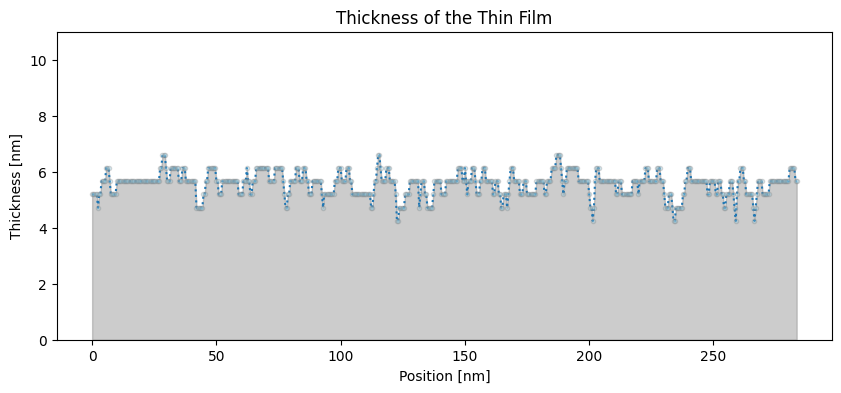

In [79]:
plt.figure(figsize=(10,4))
plt.plot(position, thickness, ':')
plt.plot(position, thickness, 'o', color='skyblue', markersize=3, markeredgecolor='gray', alpha=0.3)
plt.xlabel('Position [nm]')
plt.ylim(0, np.ceil(max(thickness))+4)
plt.ylabel('Thickness [nm]')
plt.fill_between(position, thickness, color='gray', alpha=0.4)
plt.title('Thickness of the Thin Film')
plt.show()

<Axes: ylabel='thickness'>

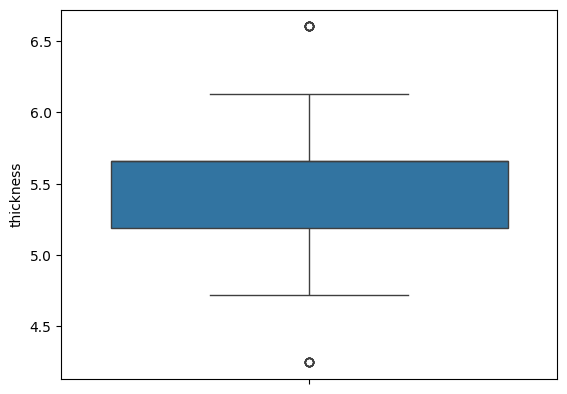

In [51]:
# get statistics about the thin film thickness
import seaborn as sns
import pandas as pd
df = pd.DataFrame({'thickness':thickness})
sns.boxplot(y='thickness', data=df)

In [52]:
df.describe()

thickness
count  602.000000
mean     5.565444
std      0.428702
min      4.245000
25%      5.189000
50%      5.660000
75%      5.660000
max      6.604000

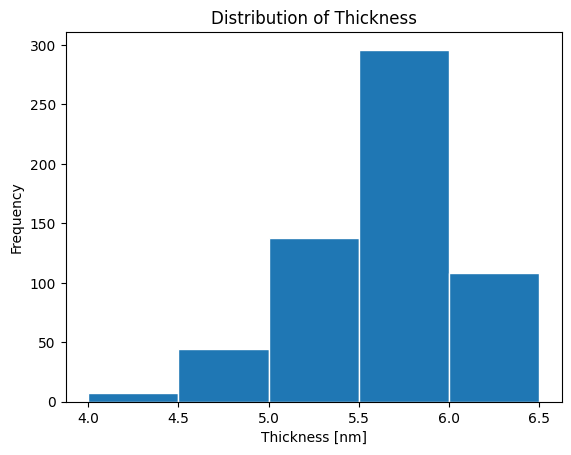

In [48]:
plt.hist(thickness, edgecolor='white', bins=np.arange(4,7,0.5))
plt.xlabel('Thickness [nm]')
plt.ylabel('Frequency')
plt.title('Distribution of Thickness')
plt.show()